In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import os
from PIL import Image
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
img=image.load_img(r"C:\Users\rites\OneDrive\Desktop\CNN\traning\happy\happy home3.jpg")

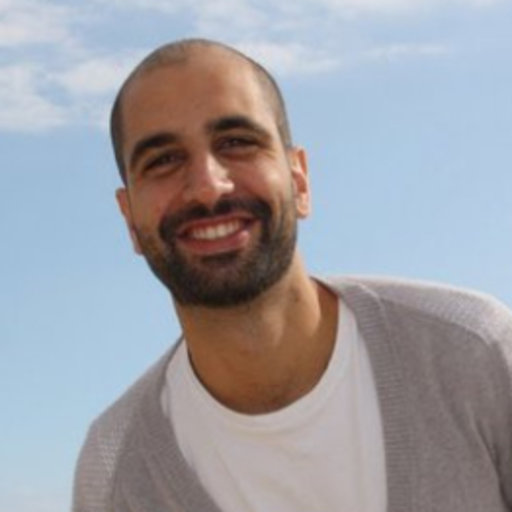

In [5]:
img

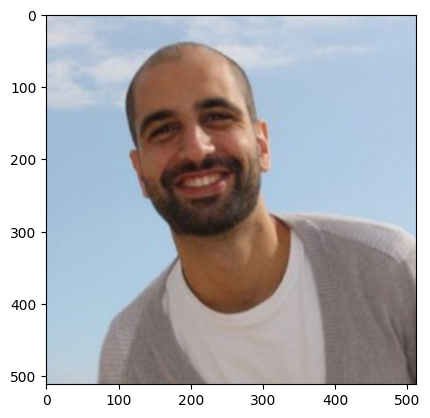

In [6]:
plt.imshow(img)

In [7]:
i1= cv2.imread(r"C:\Users\rites\OneDrive\Desktop\CNN\traning\happy\happy home3.jpg")

In [8]:
i1

array([[[227, 217, 217],
        [226, 216, 216],
        [226, 216, 216],
        ...,
        [228, 206, 194],
        [228, 206, 194],
        [227, 205, 193]],

       [[226, 216, 216],
        [226, 216, 216],
        [225, 215, 215],
        ...,
        [228, 207, 192],
        [227, 206, 191],
        [227, 206, 191]],

       [[225, 215, 215],
        [225, 215, 215],
        [225, 215, 215],
        ...,
        [227, 206, 191],
        [227, 206, 191],
        [227, 206, 191]],

       ...,

       [[211, 201, 191],
        [211, 201, 191],
        [211, 201, 191],
        ...,
        [ 56,  58,  68],
        [ 50,  52,  62],
        [ 46,  48,  58]],

       [[211, 201, 191],
        [211, 201, 191],
        [211, 201, 191],
        ...,
        [ 58,  60,  70],
        [ 51,  53,  63],
        [ 47,  49,  59]],

       [[211, 201, 191],
        [211, 201, 191],
        [211, 201, 191],
        ...,
        [ 59,  61,  71],
        [ 52,  54,  64],
        [ 47,  49,  59]]

In [9]:
i1.shape

(512, 512, 3)

In [10]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [11]:
train_dataset=train.flow_from_directory(r"C:\Users\rites\OneDrive\Desktop\CNN\traning",
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory(r"C:\Users\rites\OneDrive\Desktop\CNN\validation",
                                                 target_size=(200,200),
                                                 batch_size=3,
                                                 class_mode='binary')

Found 7 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'happy': 0, 'no happy': 1}

In [13]:
import tensorflow as tf

In [14]:
train_dataset.classes

array([0, 0, 0, 0, 1, 1, 1])

In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [16]:
model.compile(loss='binary_crossentorpy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from tensorflow.keras.losses import binary_crossentropy

model.compile(optimizer='sgd', loss=lambda y_true, y_pred: binary_crossentropy(y_true, y_pred))

model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=10,
                      validation_data=validation_dataset)


Epoch 1/10
3/3 [==============================] - 2s 238ms/step - loss: 0.7070 - val_loss: 0.7108
Epoch 2/10
3/3 [==============================] - 0s 119ms/step - loss: 0.6904 - val_loss: 0.7129
Epoch 3/10
3/3 [==============================] - 0s 118ms/step - loss: 0.6620 - val_loss: 0.6462
Epoch 4/10
3/3 [==============================] - 0s 107ms/step - loss: 0.6450 - val_loss: 0.6515
Epoch 5/10
3/3 [==============================] - 0s 107ms/step - loss: 0.6212 - val_loss: 0.6424
Epoch 6/10
3/3 [==============================] - 0s 105ms/step - loss: 0.6147 - val_loss: 0.6338
Epoch 7/10
3/3 [==============================] - 0s 113ms/step - loss: 0.7987 - val_loss: 0.6077
Epoch 8/10
3/3 [==============================] - 0s 110ms/step - loss: 0.6114 - val_loss: 0.5912
Epoch 9/10
3/3 [==============================] - 0s 122ms/step - loss: 0.6032 - val_loss: 0.5730
Epoch 10/10
3/3 [==============================] - 0s 131ms/step - loss: 0.6344 - val_loss: 0.5626


In [18]:
dir_path=r"C:\Users\rites\OneDrive\Desktop\CNN\testing"
for i in os.listdir(dir_path):
    print(i)

happy home3.jpg
happy image.4.jpg
happy image.jpg
happy image2.jpg
sad 1.jpg
sad.jpg
sad3.png


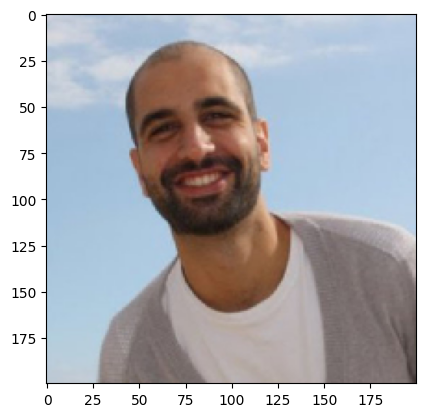

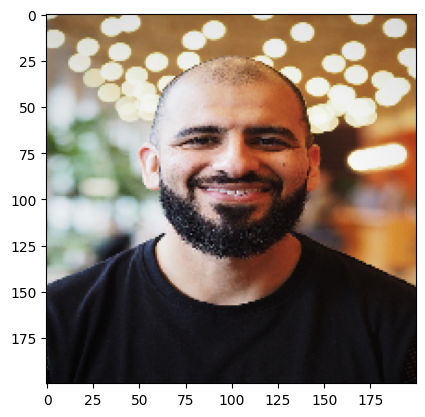

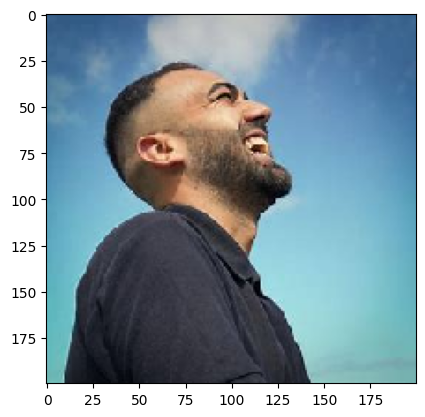

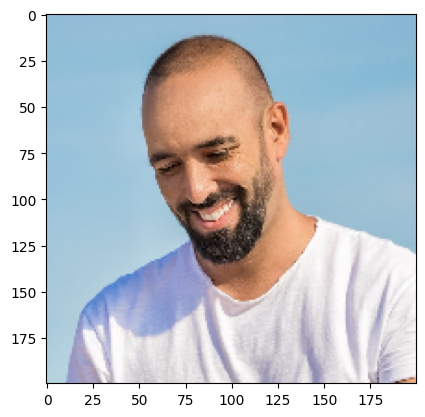

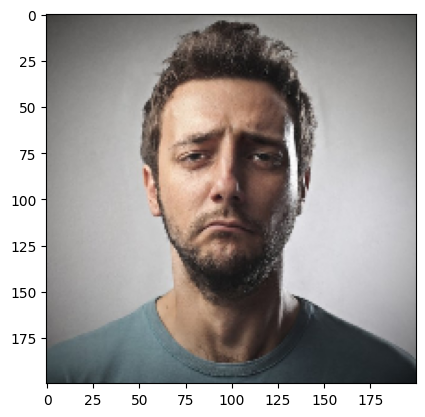

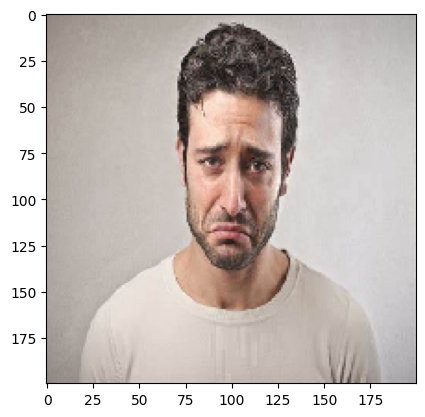

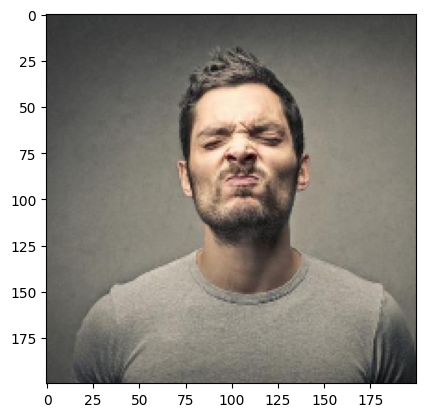

In [19]:
dir_path=r"C:\Users\rites\OneDrive\Desktop\CNN\testing"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+ '//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

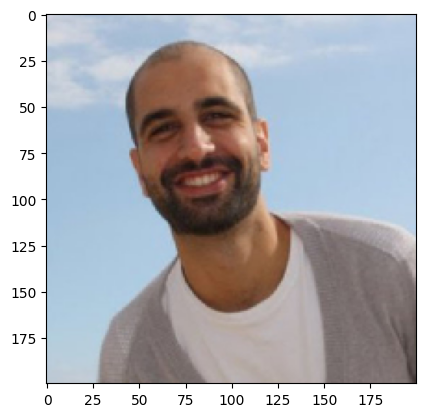

1/1 [==============================] - 0s 169ms/step
i am not happy


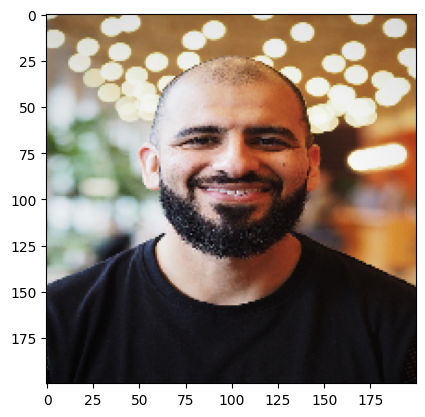

1/1 [==============================] - 0s 18ms/step
i am happy


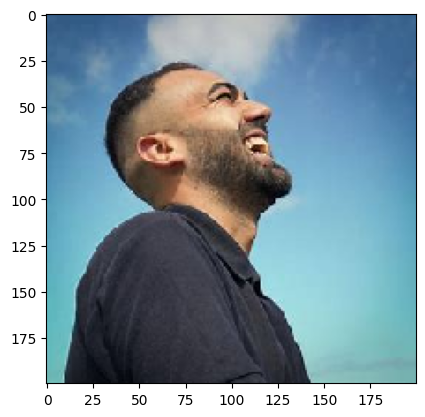

1/1 [==============================] - 0s 34ms/step
i am happy


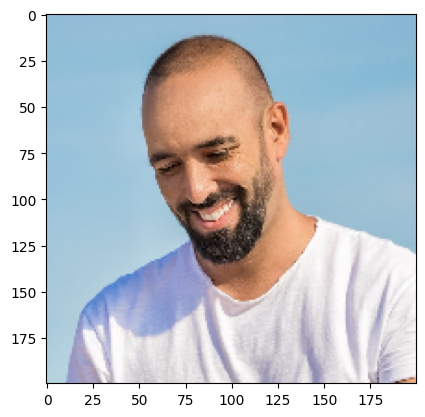

1/1 [==============================] - 0s 56ms/step
i am not happy


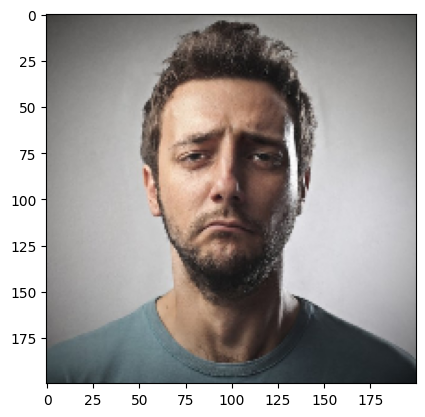

1/1 [==============================] - 0s 29ms/step
i am not happy


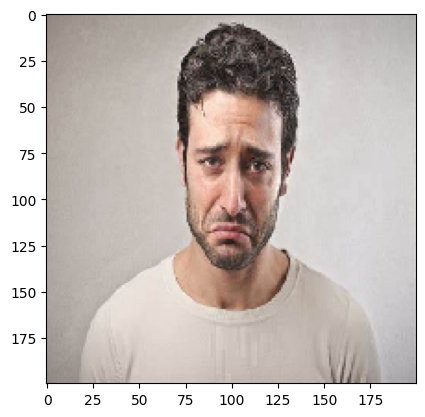

1/1 [==============================] - 0s 35ms/step
i am not happy


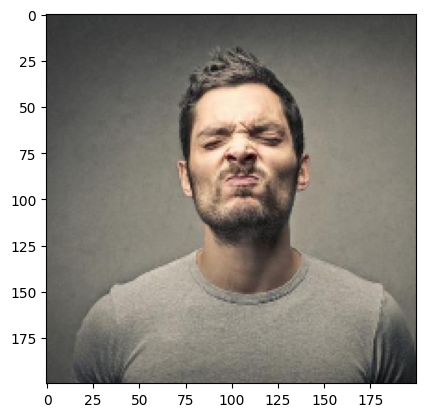

1/1 [==============================] - 0s 35ms/step
i am not happy


In [20]:
dir_path=r"C:\Users\rites\OneDrive\Desktop\CNN\testing"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+ '//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images=np.vstack([x])
    
    val=model.predict(images)
    if val==0:
        print('i am happy')
    else:
        print('i am not happy')

In [31]:
history,history??

Epoch 1/10
3/3 [==============================] - 0s 136ms/step - loss: 0.0363 - val_loss: 0.0223
Epoch 2/10
3/3 [==============================] - 0s 108ms/step - loss: 0.0167 - val_loss: 0.0373
Epoch 3/10
3/3 [==============================] - 0s 111ms/step - loss: 0.0258 - val_loss: 0.0183
Epoch 4/10
3/3 [==============================] - 0s 120ms/step - loss: 0.0181 - val_loss: 0.0151
Epoch 5/10
3/3 [==============================] - 0s 139ms/step - loss: 0.0107 - val_loss: 0.0143
Epoch 6/10
3/3 [==============================] - 0s 110ms/step - loss: 0.0097 - val_loss: 0.0136
Epoch 7/10
3/3 [==============================] - 0s 147ms/step - loss: 0.0105 - val_loss: 0.0181
Epoch 8/10
3/3 [==============================] - 0s 143ms/step - loss: 0.0115 - val_loss: 0.0122
Epoch 9/10
3/3 [==============================] - 0s 130ms/step - loss: 0.0083 - val_loss: 0.0111
Epoch 10/10
3/3 [==============================] - 0s 128ms/step - loss: 0.0083 - val_loss: 0.0107


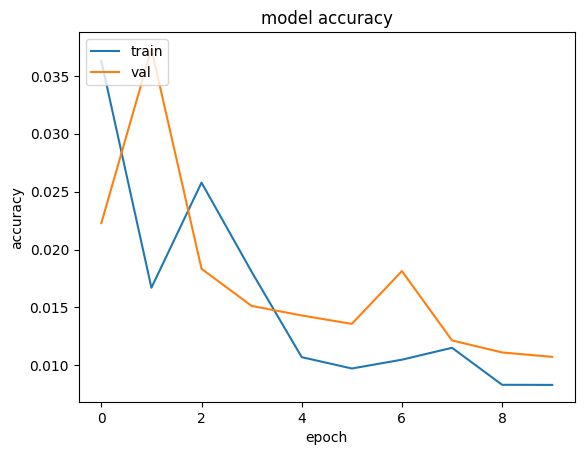

In [32]:
''''import keras 
from matplotlib import pyplot as plt'''
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()